In [3]:
import MCMC_DZ.MCMC.Statistic_tools as Sts
import numpy as np
import matplotlib.pyplot as plt

## MultiGuassian Distribution

Preparing the dataset of Gaussian Mixture Model with 2 components.  

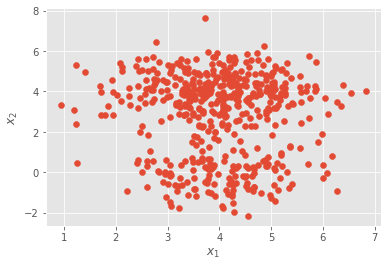

In [1]:
from MCMC_DZ.BayesianInference.Likelihood_functions.GMM_datagen import Data_params_gen_GMM
import matplotlib.pyplot as plt

GMM_data_2D_2com = Data_params_gen_GMM(n_components=2, n_dimensions=2)
_,_ = GMM_data_2D_2com.generate(datasize=500)

with plt.style.context("ggplot"):
    plt.scatter(GMM_data_2D_2com.noisy_Dataset[:, 0], GMM_data_2D_2com.noisy_Dataset[:, 1])
    plt.xlabel("$x_1$")

    plt.ylabel("$x_2$")
    plt.show()

Defining the Likelihood function with the dataset generated above.  

In [2]:
from MCMC_DZ.BayesianInference.Likelihood_functions.log_Likeli_GMM import Likeli_GMM_mus

GMM_Likeli_2D_2com = Likeli_GMM_mus(Dataset=GMM_data_2D_2com.noisy_Dataset, Sigmas=GMM_data_2D_2com.Sigmas, weights=GMM_data_2D_2com.weights, n_components=GMM_data_2D_2com.n_components)

## Apply the MCMC Algorithm

In [3]:
from MCMC_DZ.MCMC.MetropolisHastingMCMC.MHMC import MHMC
from MCMC_DZ.MCMC.MetropolisHastingMCMC.ProposalDistributions import  GaussianProposalDistribution
steps = 100000
Prop_G = GaussianProposalDistribution(sd=0.10, Dim=GMM_Likeli_2D_2com.n_dimensions*GMM_Likeli_2D_2com.n_components)
MHMC_GMM_2D_2com = MHMC(rho=GMM_Likeli_2D_2com.calculate_log_likelihoods, log_likelihood=True)
Res_G = MHMC_GMM_2D_2com.generate(
    theta0=[0 for _ in range(GMM_Likeli_2D_2com.n_dimensions*GMM_Likeli_2D_2com.n_components)], 
    qProb=Prop_G.log_qProb, 
    qSamp=Prop_G.qSample, 
    steps=steps,
    OutputRunTime=100,
    MaxTime=7
    )

In [4]:
from MCMC_DZ.MCMC.MetropolisHastingMCMC.ProposalDistributions import HamiltonianProposalFunction, HamiltonianProposalFunction_vec

Prop_H = HamiltonianProposalFunction(rho = GMM_Likeli_2D_2com.calculate_log_likelihoods, epsilon=0.01, L=5, log_likelihood=True)
MHMC_GMM_2D_2com_H = MHMC(rho=Prop_H.U, log_likelihood=True)
Res_H = MHMC_GMM_2D_2com_H.generate(
    theta0=[0.0 for _ in range(GMM_Likeli_2D_2com.n_dimensions*GMM_Likeli_2D_2com.n_components)], 
    qProb=Prop_H.log_qProb, 
    qSamp=Prop_H.qSample, 
    steps=steps,
    OutputRunTime=100,
    MaxTime=7
)


In [5]:
Prop_H_MT = HamiltonianProposalFunction_vec(rho = GMM_Likeli_2D_2com.calculate_log_likelihoods, epsilon=0.01, L=5, log_likelihood=True)
MHMC_GMM_2D_2com_H = MHMC(rho=Prop_H_MT.U, log_likelihood=True)
Res_H_MT = MHMC_GMM_2D_2com_H.generate(
    theta0=[0.0 for _ in range(GMM_Likeli_2D_2com.n_dimensions*GMM_Likeli_2D_2com.n_components)], 
    qProb=Prop_H_MT.log_qProb, 
    qSamp=Prop_H_MT.qSample, 
    steps=steps,
    OutputRunTime=100,
    MaxTime=7
)


## Visualize the output of the MCMC Algorithm

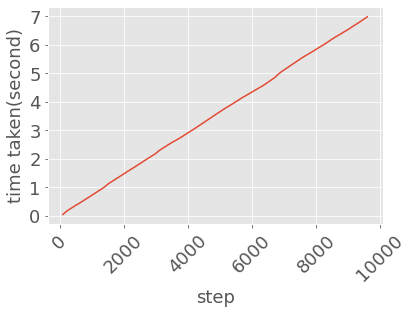

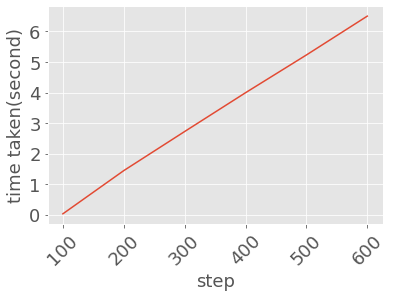

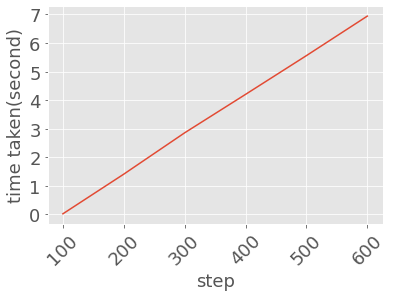

In [6]:
for Res in [Res_G, Res_H, Res_H_MT]:
    with plt.style.context("ggplot"):
        plt.plot([100*i for i in range(1, len(Res["Run_Times"])+1)], Res["Run_Times"])
        plt.ylabel("time taken(second)", fontsize=18)
        plt.yticks(fontsize=18)
        plt.xticks(rotation=45)
        plt.xlabel("step", fontsize=18)
        plt.xticks(fontsize=18)
        plt.show()

The acceptance rate of the MCMC algorithm = 0.222


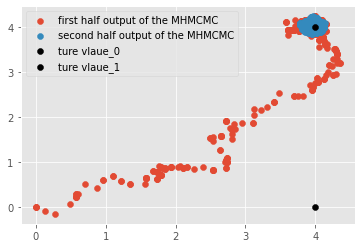

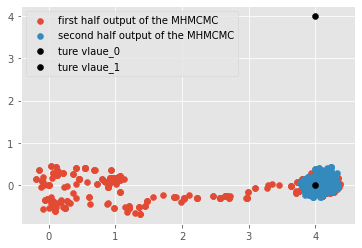

The acceptance rate of the MCMC algorithm = 0.996


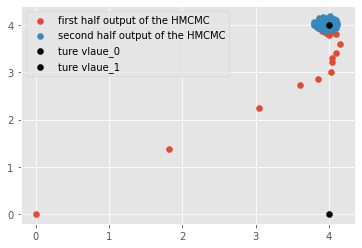

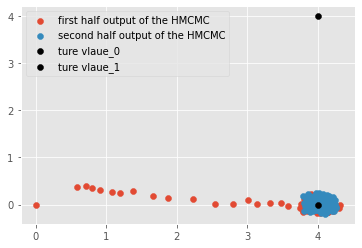

The acceptance rate of the MCMC algorithm = 0.998


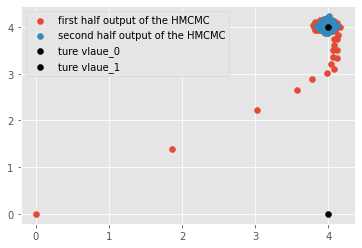

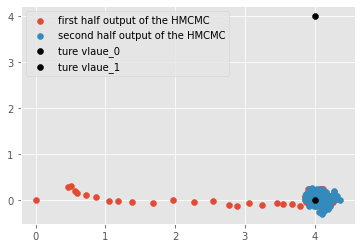

In [7]:
import numpy as np

for Res, MC_name in zip([Res_G, Res_H, Res_H_MT], ["MHMCMC", "HMCMC", "HMCMC"]):
    print(f"The acceptance rate of the MCMC algorithm = {Res['Acceptance_Rate']:.3f}")
    steps = Res["Thetas"].shape[0]
    with plt.style.context("ggplot"):
        for i in range(GMM_Likeli_2D_2com.n_components):
            plt.scatter(Res["Thetas"][:steps//2, i*2], Res["Thetas"][:steps//2, i*2+1], label=f"first half output of the {MC_name}")
            plt.scatter(Res["Thetas"][steps//2:, i*2], Res["Thetas"][steps//2:, i*2+1], label=f"second half output of the {MC_name}")

            for j in range(GMM_Likeli_2D_2com.n_components):
                plt.scatter(GMM_data_2D_2com.mus[j][0], GMM_data_2D_2com.mus[j][1], label=f"ture vlaue_{j}", color="black")
            plt.legend()
            plt.show()

In [8]:
from MCMC_DZ.MCMC.Statistic_tools import density_plot_3D
Res = Res_G

for cr in [0, 0.3, 0.9]:
    density_plot_3D(Res["Thetas"], bins=50, burn_in=2500, credible_region=cr)

/Users/zhangdian/Documents/GitHub/MResMCMC2023/MCMC_DZ/MCMC/Statistic_tools.py:225: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



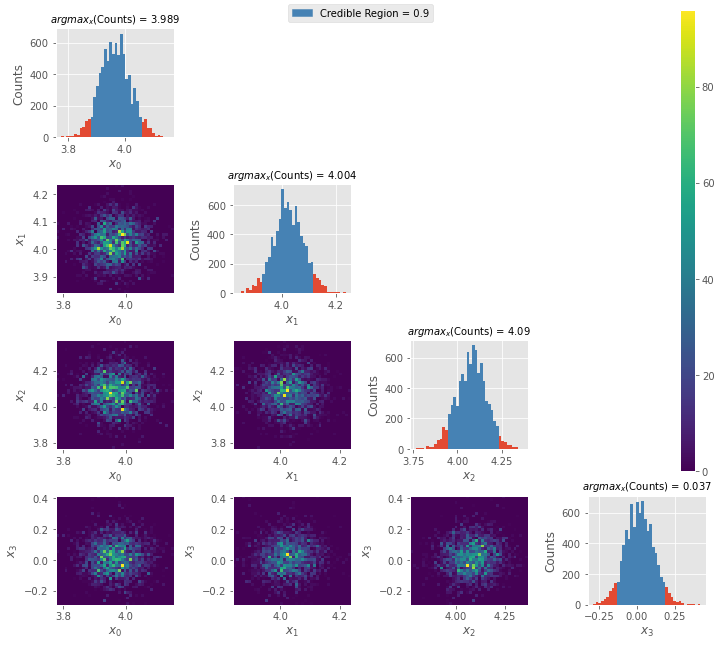

/Users/zhangdian/Documents/GitHub/MResMCMC2023/MCMC_DZ/MCMC/Statistic_tools.py:225: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



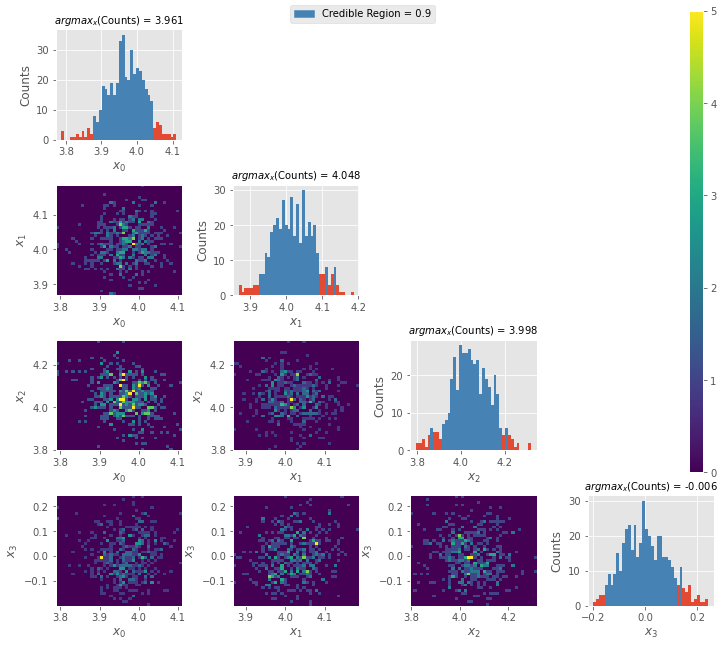

/Users/zhangdian/Documents/GitHub/MResMCMC2023/MCMC_DZ/MCMC/Statistic_tools.py:225: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



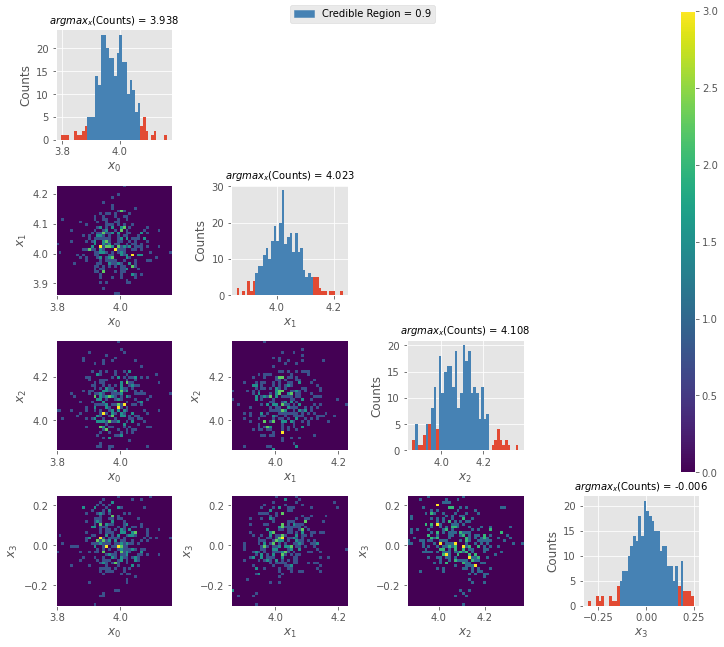

In [9]:
from MCMC_DZ.MCMC.Statistic_tools import densities_plot

for bi, Res in zip([1000, 100, 200], [Res_G, Res_H, Res_H_MT]):
    _ = densities_plot(Thetas=Res["Thetas"], plot_axis=[], bins=40, burn_in=bi, cr_1D=0.9)

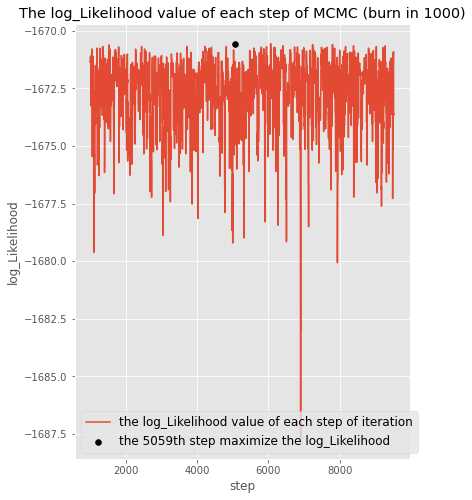

In [10]:
from MCMC_DZ.MCMC.Statistic_tools import targetDis_step_plot

for Res in [Res_G, Res_H, Res_H_MT]:
    targetDis_step_plot(Thetas=Res["Thetas"], rho=GMM_Likeli_2D_2com.calculate_log_likelihoods, target_type="log_Likelihood", return_maximum=True, burn_in=1000)
    break

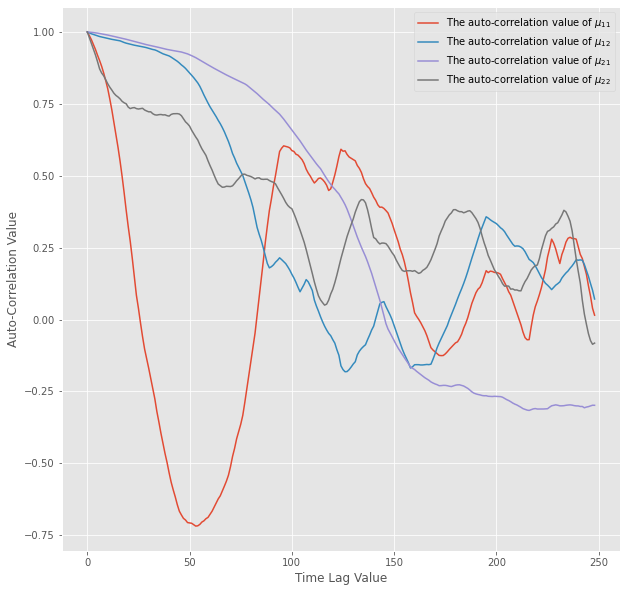

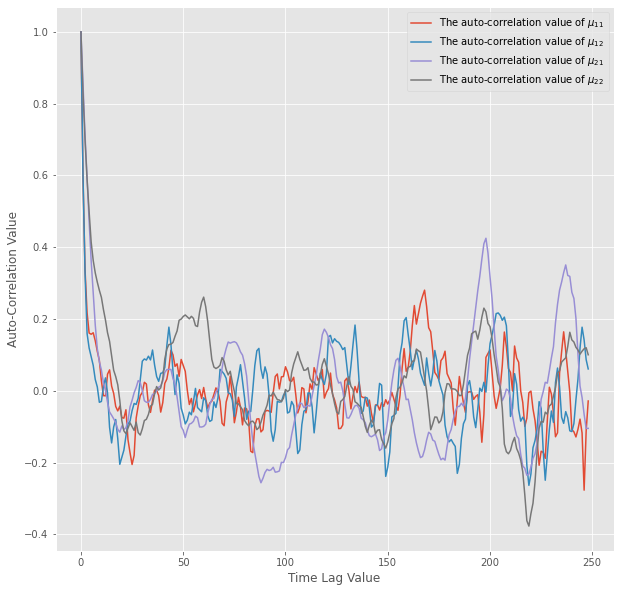

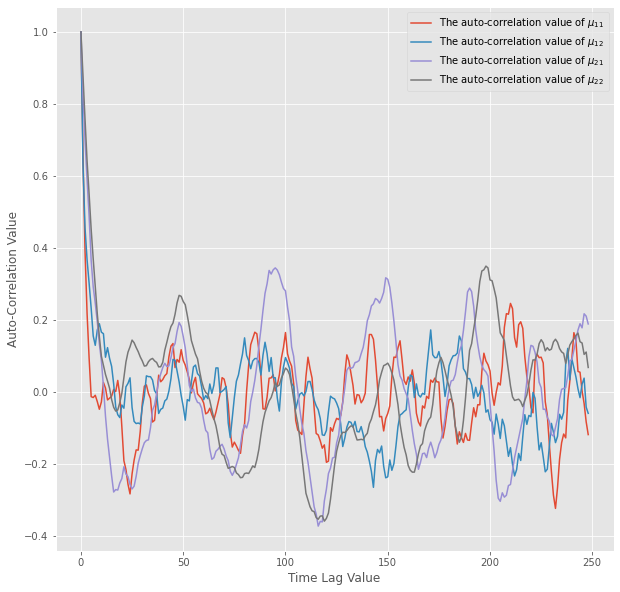

In [11]:
from MCMC_DZ.MCMC.Statistic_tools import auto_corr_plot

for Res in [Res_G, Res_H, Res_H_MT]:
    auto_corr_plot(Thetas=Res["Thetas"], plot_nth_theta=[0,1,2,3], theta_index=["$\mu_{11}$", "$\mu_{12}$", "$\mu_{21}$", "$\mu_{22}$"], max_time_lag=250, data_range=[99,499])

## Periodic Function

In [1]:
import MCMC_DZ.MCMC.Statistic_tools as Sts
import numpy as np
import matplotlib.pyplot as plt
from typing import List
import plotly.graph_objects as go

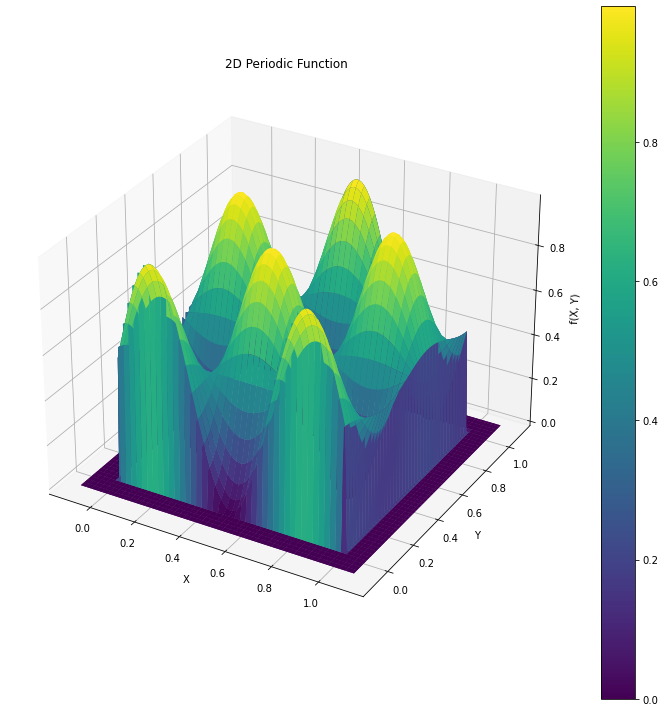

In [5]:
import numpy as np
from MCMC_DZ.BayesianInference.Likelihood_functions.Periodic_Function import Periodic_Func2D
from MCMC_DZ.MCMC.Statistic_tools import Target_Distribution_Visualization_3D

X_range = [[0,1], [0,1]]
PF  = Periodic_Func2D([1.5,1.5], X_range)

Target_Distribution_Visualization_3D(X_range=[-0.1, 1.1], Y_range=[-0.1, 1.1], Tar_Dis=PF.f, Func_name="2D Periodic Function", alpha=1, Single_vision=True)

In [3]:
from MCMC_DZ.MCMC.MetropolisHastingMCMC.MHMC import MHMC
from MCMC_DZ.MCMC.MetropolisHastingMCMC.ProposalDistributions import  GaussianProposalDistribution

steps = 10000
Prop_G = GaussianProposalDistribution(sd=0.8, Dim=2)
MHMC_PF = MHMC(rho=PF.f, log_likelihood=True)
Res_G_PF = MHMC_PF.generate(
    theta0=[-1.0 for _ in range(2)], 
    qProb=Prop_G.log_qProb, 
    qSamp=Prop_G.qSample, 
    steps=steps,
    OutputRunTime=100,
    MaxTime=60
    )

In [4]:
Res_G_PF["Run_Times"][-1]

0.9666912520000004

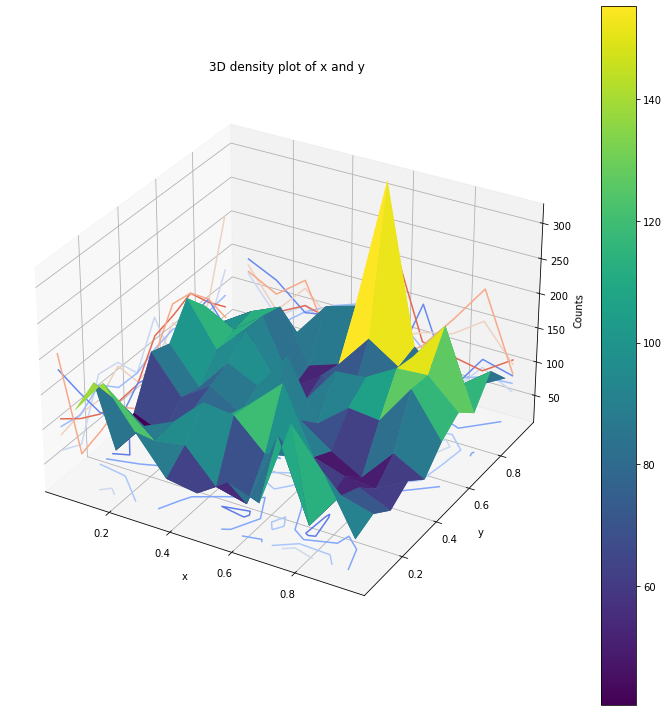

In [28]:
Sts.density_plot_3D(Res_G_PF["Thetas"], bins=10, burn_in=1000, credible_region=0, Single_vision=True)

In [1]:
Idx = np.random.choice(range(5000, 50000), 800)
Thetas_PF = Res_G_PF["Thetas"][Idx]

NameError: name 'np' is not defined

/Users/zhangdian/Documents/GitHub/MResMCMC2023/MCMC_DZ/MCMC/Statistic_tools.py:225: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



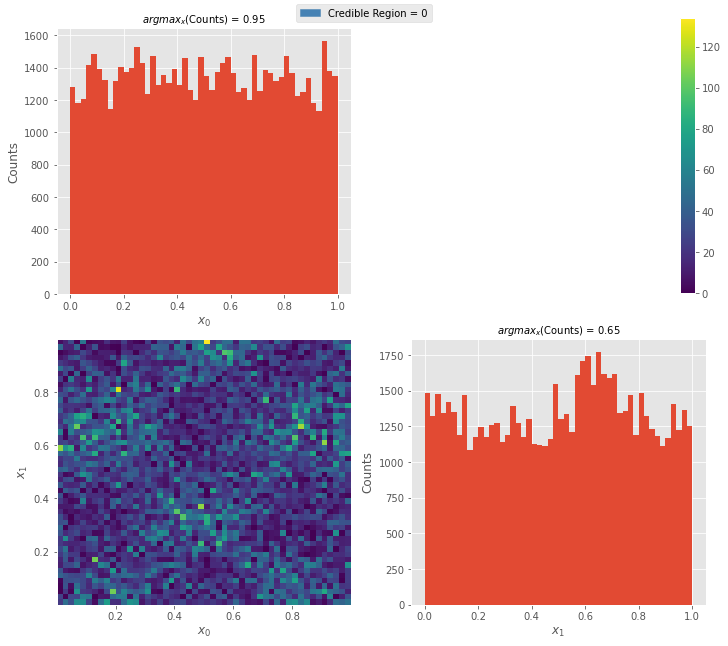

In [65]:
from MCMC_DZ.MCMC.Statistic_tools import densities_plot

_ = densities_plot(Thetas=Res_G_PF["Thetas"], plot_axis=[], bins=50, burn_in=3000)

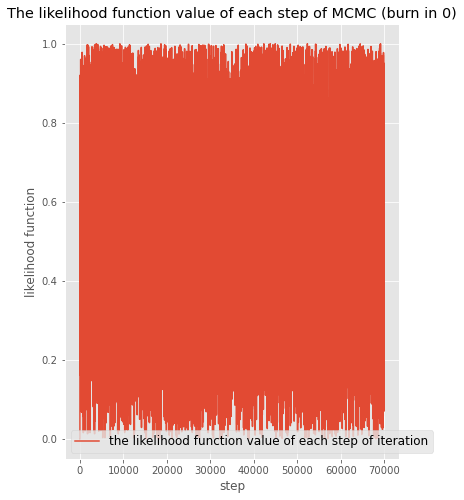

In [13]:
Sts.targetDis_step_plot(Thetas=Res_G_PF["Thetas"], rho=PF.f, target_type="likelihood function", burn_in=0)

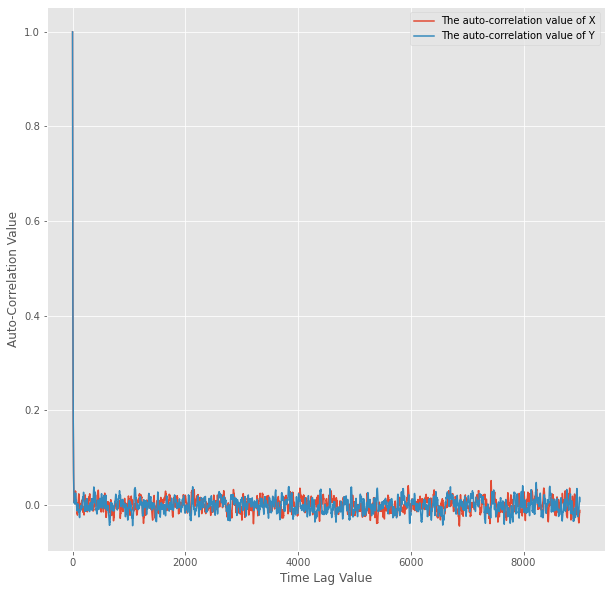

In [14]:
Sts.auto_corr_plot(Thetas=Res_G_PF["Thetas"], plot_nth_theta=[0,1], theta_index=["X", "Y"], max_time_lag=9000, data_range=[1000, 40000])

In [15]:
from typing import List

class LikelihoodFunction_Periodic:
    def __init__(self, X_range: List[List[float]], Data: np.array, burn_in: int):

        """
        Generatint the likelihhod function of the Periodic Function with the inputted Data

        Arguments
        ---------
        X_range (np.array): the range of the X
        Data (np.array): the generated data
        burn_in (int): number of inputed data burn in to generate the likelihood function

        Returns
        -------
        None

        """

        self.Data = Data[burn_in:]
        self.X_range = X_range
            
    def l(self, Freq):

        """

        The likelihood function generated with inputed pdf and Data Set

        Arguments
        ---------
        Freq (np.array): The frequency of each axis of the Periodic Function

        Returns
        -------
        (float): the likelihood value of the inputed parameter

        """

        if len(Freq.shape)==1:
            X0_in_range = np.logical_and(self.Data[:, 0] >= self.X_range[0][0], self.Data[:, 0] <= self.X_range[0][1])
            X1_in_range = np.logical_and(self.Data[:, 1] >= self.X_range[1][0], self.Data[:, 1] <= self.X_range[1][1])
            in_range = np.logical_and(X0_in_range, X1_in_range)
            Res = np.zeros(self.Data.shape[0])
            Res[in_range] = (np.sin(2 * np.pi * Freq[0] * self.Data[in_range, 0]) * np.cos(2 * np.pi * Freq[1] * self.Data[in_range, 1]) + 1)/2
            return np.prod(Res)
        else:
            X0_in_range = np.logical_and(self.Data[:, 0] >= self.X_range[0][0], self.Data[:, 0] <= self.X_range[0][1])
            X1_in_range = np.logical_and(self.Data[:, 1] >= self.X_range[1][0], self.Data[:, 1] <= self.X_range[1][1])
            in_range = np.logical_and(X0_in_range, X1_in_range)
            Res = np.zeros((Freq.shape[0], self.Data.shape[0]))
            Res[:, in_range] = (np.sin(2 * np.pi * Freq[:, 0].reshape(-1, 1) * self.Data[in_range, 0]) * np.cos(2 * np.pi * Freq[:, 1].reshape(-1, 1) * self.Data[in_range, 1]) + 1) / 2
            return np.prod(Res, axis=1)

    
    def log_l(self, Freq):

        """

        The log likelihood function generated with inputed pdf and Data Set

        Arguments
        ---------
        Freq (np.array): The frequency of each axis of the Periodic Function

        Returns
        -------
        (float): the log likelihood value of the inputed parameter

        """
        return np.log(self.l(Freq))

In [16]:
import plotly.graph_objects as go

def Target_Distribution_Visualization_3D(X_range: List, Y_range: List, Tar_Dis: object, Func_name: str, alpha=1, Single_vision=False):

    """

    Plotting the 3D plot of the Target Distribution of the MCMC algorithm

    Arguments
    ---------
    X_range (List[float]): the range of the x axis of the plot
    Y_range (List[float]): the range of the y axis of the plot
    Tar_Dis (Callable): the target distritbution to visualize
    Func_name (string): the name of the function to be visualized
    alpha (float): the alpha transparency of the plot
    Single_vision (bool): deciding whether to plot interactable plot

    Returns
    -------
    None
    
    """

    # Define thei grid 
    X_val = np.linspace(X_range[0], X_range[1], 100)
    Y_val = np.linspace(Y_range[0], Y_range[1], 100)
    X_grid, Y_grid = np.meshgrid(X_val, Y_val)

    # Compute the values of the z-axis
    Z_grid = Tar_Dis(np.column_stack((X_grid.flatten(), Y_grid.flatten())))
    Z_grid = Z_grid.reshape(X_grid.shape)

    if Single_vision:
        # Creat the surface plot
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(X_grid, Y_grid, Z_grid, cmap='virdis')
        fig.colorbar(ax.plot_surface(x=X_grid, y=Y_grid, z=Z_grid, cmap='virdis'))

        # Set the plot title and axis labels
        ax.set_xlabel("X")
        ax.set_yalebl("Y")
        ax.set_zlabel("f(X, Y)")
        ax.set_title(Func_name)
        plt.tight_layout()
        plt.show()
    
    else:
        # Create the surface plot
        fig = go.Figure(data = [go.Surface(x=X_grid, y=Y_grid, z=Z_grid, opacity=alpha)])

        # Set the plot title and axis labels
        fig.update_layout(
            width=800,
            height=800,
            title = Func_name,
            scene = dict(
                xaxis_title = "X",
                yaxis_title = "Y",
                zaxis_title = "f(X, Y)",
            )
        )

        fig.show()

In [17]:
l_PF = LikelihoodFunction_Periodic(X_range=X_range, Data=Thetas_PF, burn_in=0)
Target_Distribution_Visualization_3D(X_range=[0, 3], Y_range=[0, 3], Tar_Dis=l_PF.log_l, Func_name="Likelihood Function of 2D Periodic Function", alpha=1)

/var/folders/sn/xtxyc9q57g94hd9p4mx0nfb80000gn/T/ipykernel_13862/2245242966.py:71: RuntimeWarning:

divide by zero encountered in log



## Sinusoidal Function

In [19]:
import numpy as np
from MCMC_DZ.MCMC.Statistic_tools import Target_Distribution_Visualization_3D
from _3D_Sinusoidal_Function.sinusoidal_function import Sinusoidal

SF = Sinusoidal([1], [2], [0.65], [[-4,4], [-4, 4]])
Target_Distribution_Visualization_3D(X_range=[-4.5, 4.5], Y_range=[-4.5, 4.5], Tar_Dis=SF.f, Func_name="2D Periodic Function", alpha=1)

In [20]:
from MCMC_DZ.MCMC.MetropolisHastingMCMC.MHMC import MHMC
from MCMC_DZ.MCMC.MetropolisHastingMCMC.ProposalDistributions import  GaussianProposalDistribution

steps = 100000
Prop_G = GaussianProposalDistribution(sd=0.5, Dim=2)
MHMC_SF = MHMC(rho=SF.f, log_likelihood=True)
Res_G_SF = MHMC_SF.generate(
    theta0=[-1.0 for _ in range(2)], 
    qProb=Prop_G.log_qProb, 
    qSamp=Prop_G.qSample, 
    steps=steps,
    OutputRunTime=100,
    MaxTime=60
    )

In [22]:
Res_G_SF["Run_Times"][-1]

16.56752004199916

In [9]:
from MCMC_DZ.MCMC.Statistic_tools import density_plot_3D

density_plot_3D(Res_G_SF["Thetas"], bins=14, burn_in=1000, credible_region=0, alpha=1)

/Users/zhangdian/Documents/GitHub/MResMCMC2023/MCMC_DZ/MCMC/Statistic_tools.py:225: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



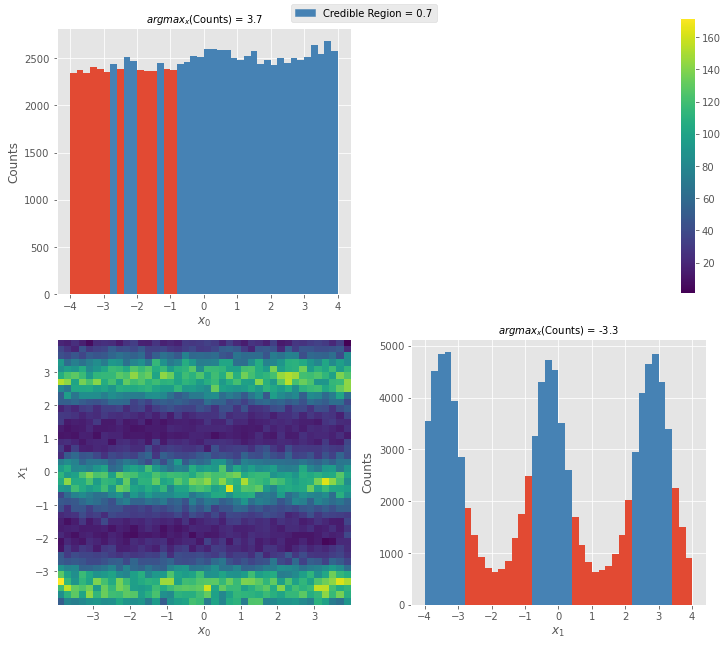

In [12]:
from MCMC_DZ.MCMC.Statistic_tools import densities_plot
_ = densities_plot(Thetas=Res_G_SF["Thetas"], plot_axis=[], bins=40, burn_in=1000, cr_1D=0.7)

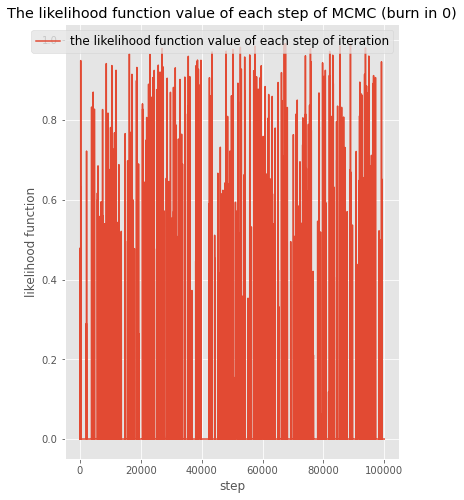

In [28]:
Sts.targetDis_step_plot(Thetas=Res_G_SF["Thetas"], rho=PF.f, target_type="likelihood function", burn_in=0)

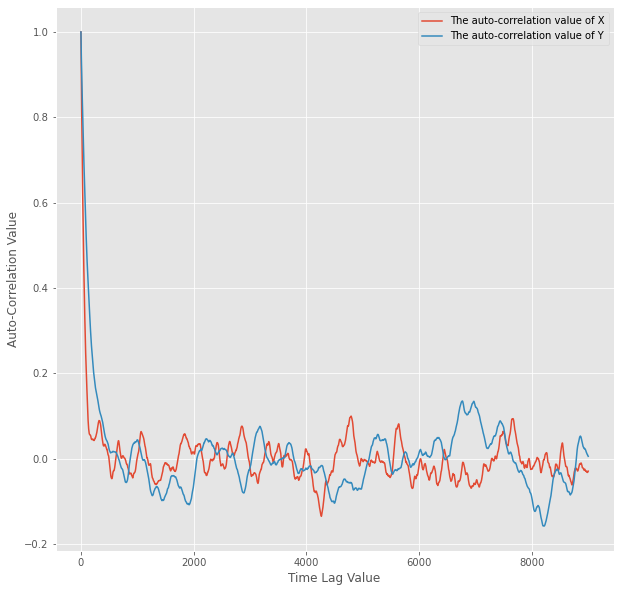

In [27]:
Sts.auto_corr_plot(Thetas=Res_G_SF["Thetas"], plot_nth_theta=[0,1], theta_index=["X", "Y"], max_time_lag=9000, data_range=[1000, 40000])